In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

# Add the parent directory of your current notebook to sys.path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../..')))
from NN_Class import NeuralNetwork

# Load & Process the Data

In [2]:
#load the data
# create one big list of tuples for training and one for testing
# keys are the image array and the values are the labels
# 0 will be circle, 1 square, 2 triangle & 3 star
# dict for training & test data
training_data = []
testing_data = []
#triangles
data_file_triangles = open("./shapes_processed_20/triangles.csv")
data_triangles = data_file_triangles.readlines()
training_data_triangles = []
test_data_triangles = []
for i, record in enumerate(data_triangles):
    all_values = record.split(",")
    #scale and shift the inputs
    inputs = ((np.asfarray(all_values) / 255) * 0.99)
    if i < len(data_triangles)*0.8:
        training_data_triangles.append(inputs)
        training_data.append((inputs, 2))
    else:
        test_data_triangles.append(inputs)
        testing_data.append((inputs, 2))
    
#circles
data_file_cricles = open("./shapes_processed_20/circles.csv")
data_cricles = data_file_cricles.readlines()
training_data_cricles = []
test_data_cricles = []
for i, record in enumerate(data_cricles):
    all_values = record.split(",")
    #scale and shift the inputs
    inputs = ((np.asfarray(all_values) / 255) * 0.99)
    if i < len(data_cricles)*0.8:
        training_data_cricles.append(inputs)
        training_data.append((inputs, 0))
    else:
        test_data_cricles.append(inputs)
        testing_data.append((inputs, 0))
        
#squares
data_file_squares = open("./shapes_processed_20/squares.csv")
data_squares = data_file_squares.readlines()
training_data_squares = []
test_data_squares = []
for i, record in enumerate(data_squares):
    all_values = record.split(",")
    #scale and shift the inputs
    inputs = ((np.asfarray(all_values) / 255) * 0.99)
    if i < len(data_squares)*0.8:
        training_data_squares.append(inputs)
        training_data.append((inputs, 1))
    else:
        test_data_squares.append(inputs)
        testing_data.append((inputs, 1))
        
#stars
data_file_stars = open("./shapes_processed_20/stars.csv")
data_stars = data_file_stars.readlines()
training_data_stars = []
test_data_stars = []
for i, record in enumerate(data_stars):
    all_values = record.split(",")
    #scale and shift the inputs
    inputs = ((np.asfarray(all_values) / 255) * 0.99)
    if i < len(data_stars)*0.8:
        training_data_stars.append(inputs)
        training_data.append((inputs, 3))
    else:
        test_data_stars.append(inputs)
        testing_data.append((inputs, 3))


3500


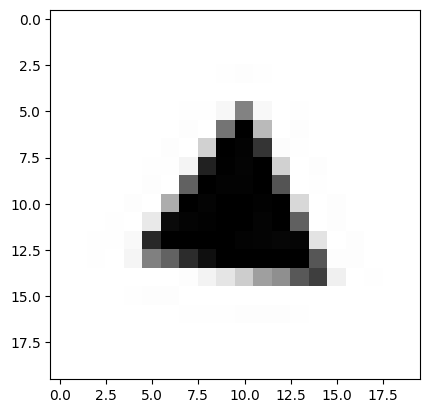

In [3]:
print(len(data_triangles))
test_values = data_triangles[0].split(",")
inputs = ((np.asfarray(test_values) / 255) * 0.99)
plt.imshow(np.array(inputs).reshape(20,20), cmap='Greys', interpolation='None')

In [4]:
#random shuffle the training & test data
import random

# Shuffle the training data
random.shuffle(training_data)

# Shuffle the test data
random.shuffle(testing_data)

In [5]:
#create the model
output_nodes = 4
NN = NeuralNetwork(400, 300, output_nodes, 0.1)

# Train the Model using a custom python class

In [6]:
# train the nn
epochs = 5

for e in range(epochs):
    for record in training_data:
        inputs = record[0]
        #create targets
        targets = np.zeros(output_nodes) + 0.01
        targets[int(record[1])] = 0.99
        NN.train(inputs, targets)

# Test the Model

In [7]:
# test the nn
scorecard = []

# loop through test data
for record in testing_data:
        inputs = record[0]
        correct_label = record[1]
        #query nn
        outputs = NN.query(inputs)
        label = np.argmax(outputs)
        #evaluate
        if (label == correct_label):
            scorecard.append(1)
        else:
            scorecard.append(0)

In [8]:
#calculate performance score
score_total = sum(scorecard)
print(f"Score: {score_total/len(scorecard)}")
print(len(scorecard), score_total)

Score: 1.0
2800 2800


# Save the model weights

In [9]:
NN.save_weights()